# 更高级的scikit-learn介绍

在本节教程中将会绘制几个图形，于是我们激活matplotlib,使得在notebook中显示内联图。

In [27]:
# 启用matlibplot的内联模式
%matplotlib inline
import matplotlib.pyplot as plt

# 为什么要出这个教程？

`scikit-learn`提供最先进的机器学习算法。 但是，这些算法不能直接用于原始数据。 原始数据需要事先进行预处理。 因此，除了机器学习算法之外，`scikit-learn`还提供了一套预处理方法。此外，`scikit-learn`提供用于流水线化这些估计器的连接器(即变压器，回归器，分类器，聚类器等)。在本教程中,将介绍scikit-learn功能集，允许流水线估计器、评估这些流水线、使用超参数优化调整这些流水线以及创建复杂的预处理步骤。

## 1.基本用例：训练和测试分类器

对于第一个示例，我们将在数据集上训练和测试一个分类器。 我们将使用此示例来回忆`scikit-learn`的API。

我们将使用`digits`数据集，这是一个手写数字的数据集。

In [28]:
# 完成数据集的加载
from sklearn.datasets import load_digits
# return_X_y默认为False，这种情况下则为一个Bunch对象，改为True，可以直接得到(data, target)
X, y = load_digits(return_X_y=True)

X中的每行包含64个图像像素的强度。 对于X中的每个样本，我们得到表示所写数字对应的y。

The digit in the image is 0


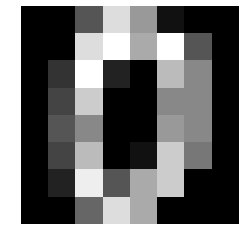

In [29]:
# 下面完成灰度图的绘制
# 灰度显示图像
plt.imshow(X[0].reshape(8, 8), cmap='gray');
# 关闭坐标轴
plt.axis('off')
# 格式化打印
print('The digit in the image is {}'.format(y[0]))

在机器学习中，我们应该通过在不同的数据集上进行训练和测试来评估我们的模型。`train_test_split`是一个用于将数据拆分为两个独立数据集的效用函数。 `stratify`参数可强制将训练和测试数据集的类分布与整个数据集的类分布相同。

In [30]:
# 划分数据为训练集与测试集,添加stratify参数，以使得训练和测试数据集的类分布与整个数据集的类分布相同。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

一旦我们拥有独立的培训和测试集，我们就可以使用`fit`方法学习机器学习模型。 我们将使用`score`方法来测试此方法，依赖于默认的准确度指标。

In [31]:
# 求出Logistic回归的精确度得分
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.95


`scikit-learn`的API在分类器中是一致的。因此，我们可以通过`RandomForestClassifier`轻松替换`LogisticRegression`分类器。这些更改很小，仅与分类器实例的创建有关。

In [32]:
# RandomForestClassifier轻松替换LogisticRegression分类器
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the RandomForestClassifier is 0.96


#### 练习
完成接下来的练习：

* 加载乳腺癌数据集。从`sklearn.datasets`导入函数`load_breast_cancer`

In [74]:
# %load solutions/01_1_solutions.py

* 使用`sklearn.model_selection.train_test_split`拆分数据集并保留30％的数据集以进行测试。确保对数据进行分层（即使用`stratify`参数）并将`random_state`设置为0。

In [33]:
# %load solutions/01_2_solutions.py

* 使用训练数据训练监督分类器。

In [34]:
# %load solutions/01_3_solutions.py

* 使用拟合分类器预测测试集的分类标签。

In [35]:
# %load solutions/01_4_solutions.py

* 计算测试集的balanced精度。您需要从`sklearn.metrics`导入`balanced_accuracy_score`

In [36]:
# %load solutions/01_5_solutions.py

## 2.更高级的用例：在训练和测试分类器之前预处理数据

### 2.1 标准化您的数据

在学习模型之前可能需要预处理。例如，一个用户可能对创建手工制作的特征或者算法感兴趣，那么他可能会对数据进行一些先验假设。在我们的例子中，`LogisticRegression`使用的求解器期望数据被规范化。因此，我们需要在训练模型之前标准化数据。为了观察这个必要条件，我们将检查训练模型所需的迭代次数。

In [39]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000, random_state=42)
clf.fit(X_train, y_train)
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

LogisticRegression required 1841 iterations to be fitted


`MinMaxScaler`变换器用于规范化数据。该标量应该以下列方式应用：学习（即，`fit`方法）训练集上的统计数据并标准化（即，`transform`方法）训练集和测试集。 最后，我们将训练和测试这个模型并得到归一化后的数据集。

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))
print('{} required {} iterations to be fitted'.format(clf.__class__.__name__, clf.n_iter_[0]))

Accuracy score of the LogisticRegression is 0.96
LogisticRegression required 190 iterations to be fitted


通过归一化数据，模型的收敛速度要比未归一化的数据快得多。(迭代次数变少了)

### 2.2 错误的预处理模式

我们强调了如何预处理和充分训练机器学习模型。发现预处理数据的错误方法也很有趣。其中有两个潜在的错误，易于犯错但又很容易发现。

第一种模式是在整个数据集分成训练和测试集之前标准化数据。

In [46]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_prescaled, X_test_prescaled, y_train_prescaled, y_test_prescaled = train_test_split(
    X_scaled, y, stratify=y, random_state=42)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train_prescaled)
accuracy = clf.score(X_test_prescaled, y_test_prescaled)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.96


第二种模式是独立地标准化训练和测试集。它回来在训练和测试集上调用`fit`方法。因此，训练和测试集的标准化不同。

In [51]:
scaler = MinMaxScaler()
X_train_prescaled = scaler.fit_transform(X_train)
# 这里发生了变化(将transform替换为fit_transform)
X_test_prescaled = scaler.fit_transform(X_test)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, random_state=42)
clf.fit(X_train_prescaled, y_train)
accuracy = clf.score(X_test_prescaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.96


### 2.3 保持简单，愚蠢：使用scikit-learn的管道连接器

前面提到的两个模式是数据泄漏的问题。然而，当必须手动进行预处理时，很难防止这种错误。因此,`scikit-learn`引入了`Pipeline`对象。它依次连接多个变压器和分类器（或回归器）。我们可以创建一个如下管道：

In [54]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('clf', LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42))])

我们看到这个管道包含了缩放器(归一化)和分类器的参数。 有时，为管道中的每个估计器命名可能会很繁琐。 而`make_pipeline`将自动为每个估计器命名，这是类名的小写。

In [55]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000))

管道将具有相同的API。 我们使用`fit`来训练分类器和`socre`来检查准确性。 然而，调用`fit`会调用管道中所有变换器的`fit_transform`方法。 调用`score`（或`predict`和`predict_proba`）将调用管道中所有变换器的内部变换。 它对应于本文2.1中的规范化过程。

In [57]:
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))

Accuracy score of the Pipeline is 0.96


我们可以使用`get_params()`检查管道的所有参数。

In [58]:
pipe.get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='auto',
           n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'steps'

#### 练习

重用第一个练习的乳腺癌数据集来训练,可以从`linear_model`导入`SGDClassifier`。 使用此分类器和从`sklearn.preprocessing`导入的`StandardScaler`变换器来创建管道。然后训练和测试这条管道。

In [60]:
# %load solutions/02_solutions.py

## 3.当更多优于更少时：交叉验证而不是单独拆分

分割数据对于评估统计模型性能是必要的。 但是，它减少了可用于学习模型的样本数量。 因此，应尽可能使用交叉验证。有多个拆分也会提供有关模型稳定性的信息。

`scikit-learn`提供了三个函数：`cross_val_score`，`cross_val_predict`和[`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)。 后者提供了有关拟合时间，训练和测试分数的更多信息。 我也可以一次返回多个分数。

In [62]:
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        max_iter=1000, random_state=42))
scores = cross_validate(pipe, X, y, cv=3, return_train_score=True)

使用交叉验证函数，我们可以快速检查训练和测试分数，并使用`pandas`快速绘图。

In [65]:
import pandas as pd

df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,0.295830,0.002998,0.925249,0.988285
1,0.234865,0.001000,0.943239,0.984975
2,0.242779,0.000998,0.924497,0.993339


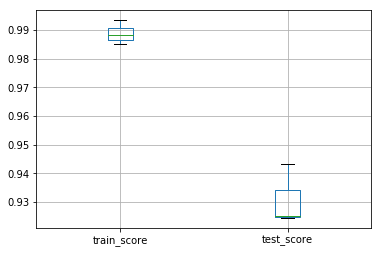

In [68]:
# pandas绘制箱体图
df_scores[['train_score', 'test_score']].boxplot()

#### 练习

使用上一个练习的管道并进行交叉验证，而不是单个拆分评估。

In [76]:
# %load solutions/03_solutions.py

## 4.超参数优化：微调管道内部

有时您希望找到管道组件的参数，从而获得最佳精度。 我们已经看到我们可以使用`get_params()`检查管道的参数。

In [77]:
pipe.get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='auto',
           n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'steps'

可以通过穷举搜索来优化超参数。 [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 提供此类实用程序，并通过参数网格进行交叉验证的网格搜索。

如下例子，我们希望优化`LogisticRegression`分类器的`C`和`penalty`参数。

In [79]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto',
                                        random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'logisticregression__C': [0.1, 1.0, 10], 'logisticregression__penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

在拟合网格搜索对象时，它会在训练集上找到最佳的参数组合（使用交叉验证）。 我们可以通过访问属性`cv_results_`来得到网格搜索的结果。 通过这个属性允许我们可以检查参数对模型性能的影响。


In [81]:
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.630638,0.001633,0.001668,4.717075e-04,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.951542,0.935268,0.941573,0.942836,0.006717,5,0.952968,0.959956,0.952328,0.955084,0.003455
1,1.278866,0.312218,0.007662,5.731576e-03,0.1,l1,"{'logisticregression__C': 0.1, 'logisticregres...",0.885463,0.908482,0.883146,0.892353,0.011425,6,0.905935,0.902113,0.902439,0.903496,0.001730
2,2.119511,0.025586,0.002000,3.371748e-07,1,l2,"{'logisticregression__C': 1.0, 'logisticregres...",0.977974,0.955357,0.957303,0.963623,0.010263,2,0.985442,0.987764,0.986696,0.986634,0.000949
3,5.357021,1.677848,0.001999,8.165348e-04,1,l1,"{'logisticregression__C': 1.0, 'logisticregres...",0.964758,0.950893,0.943820,0.953229,0.008710,4,0.977604,0.977753,0.981153,0.978837,0.001639
4,5.230732,0.494651,0.002666,1.246258e-03,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.977974,0.962054,0.964045,0.968077,0.007103,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,15.089679,1.777179,0.001668,9.456071e-04,10,l1,"{'logisticregression__C': 10, 'logisticregress...",0.973568,0.957589,0.950562,0.960653,0.009643,3,1.000000,1.000000,1.000000,1.000000,0.000000


默认情况下，网格搜索对象也表现为估计器。 一旦它被`fit`后，调用`score`将超参数固定为找到的最佳参数。

In [83]:
grid.best_params_

{'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}

此外，可以将网格搜索称为任何其他分类器以进行预测。

In [84]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.96


最重要的是，我们只对单个分割进行网格搜索。 但是，如前所述，我们可能有兴趣进行外部交叉验证，以估计模型的性能和不同的数据样本，并检查性能的潜在变化。 由于网格搜索是一个估计器，我们可以直接在`cross_validate`函数中使用它。

In [85]:
scores = cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_score,train_score
0,72.695851,0.001000,0.928571,0.985774
1,76.109882,0.001014,0.946578,0.997496
2,72.178146,0.001002,0.924497,0.993339


#### 练习

重复使用乳腺癌数据集的先前管道并进行网格搜索以评估`hinge`(铰链) and `log`(对数)损失之间的差异。此外，微调`penalty`。

In [86]:
# %load solutions/04_solutions.py

## 5.总结：我的scikit-learn管道只有不到10行代码（跳过import语句）

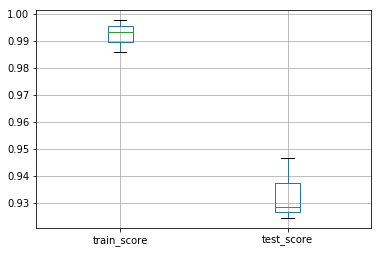

In [87]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

pipe = make_pipeline(MinMaxScaler(),
                     LogisticRegression(solver='saga', multi_class='auto', random_state=42, max_iter=5000))
param_grid = {'logisticregression__C': [0.1, 1.0, 10],
              'logisticregression__penalty': ['l2', 'l1']}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, cv=3, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()

## 6.异构数据：当您使用数字以外的数据时

到目前为止，我们使用scikit-learn来训练使用数值数据的模型。

In [89]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

X是仅包含浮点值的NumPy数组。 但是，数据集可以包含混合类型。

In [115]:
import os
data = pd.read_csv(os.path.join('data', 'titanic_openml.csv'), na_values='?')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


泰坦尼克号数据集包含分类，文本和数字特征。 我们将使用此数据集来预测乘客是否在泰坦尼克号中幸存下来。

让我们将数据拆分为训练和测试集，并将幸存列用作目标。

In [116]:
y = data['survived']
X = data.drop(columns='survived')

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

首先，可以尝试使用`LogisticRegression`分类器，看看它的表现有多好。

In [121]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

哎呀，大多数分类器都设计用于处理数值数据。 因此，我们需要将分类数据转换为数字特征。 最简单的方法是使用`OneHotEncoder`对每个分类特征进行读热编码。 让我们以`sex`与`embarked`列为例。 请注意，我们还会遇到一些缺失的数据。 我们将使用`SimpleImputer`用常量值替换缺失值。

In [122]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
ohe = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_encoded = ohe.fit_transform(X_train[['sex', 'embarked']])
X_encoded.toarray()

array([[0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.]])

这样，可以对分类特征进行编码。 但是，我们也希望标准化数字特征。 因此，我们需要将原始数据分成2个子组并应用不同的预处理：（i）分类数据的独热编；（ii）数值数据的标准缩放(归一化)。 我们还需要处理两种情况下的缺失值： 对于分类列，我们将字符串`'missing_values'`替换为缺失值，该字符串将自行解释为类别。 对于数值数据，我们将用感兴趣的特征的平均值替换缺失的数据。

In [123]:
col_cat = ['sex', 'embarked']
col_num = ['age', 'sibsp', 'parch', 'fare']

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [124]:
from sklearn.preprocessing import StandardScaler

scaler_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_train_cat_enc = scaler_cat.fit_transform(X_train_cat)
X_test_cat_enc = scaler_cat.transform(X_test_cat)

scaler_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

我们应该像在本文2.1中那样在训练和测试集上应用这些变换。

In [125]:
import numpy as np
from scipy import sparse

X_train_scaled = sparse.hstack((X_train_cat_enc,
                                sparse.csr_matrix(X_train_num_scaled)))
X_test_scaled = sparse.hstack((X_test_cat_enc,
                               sparse.csr_matrix(X_test_num_scaled)))

转换完成后，我们现在可以组合所有数值的信息。最后，我们使用`LogisticRegression`分类器作为模型。

In [126]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.79


上面首先转换数据然后拟合/评分分类器的模式恰好是本节2.1的模式之一。因此，我们希望为此目的使用管道。但是，我们还希望对矩阵的不同列进行不同的处理。应使用`ColumnTransformer`转换器或`make_column_transformer`函数。它用于在不同的列上自动应用不同的管道。

In [127]:
from sklearn.compose import make_column_transformer

pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(SimpleImputer(), StandardScaler())
preprocessor = make_column_transformer((col_cat, pipe_cat), (col_num, pipe_num))

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs'))

pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)
print('Accuracy score of the {} is {:.2f}'.format(pipe.__class__.__name__, accuracy))

Accuracy score of the Pipeline is 0.79


此外，它还可以被使用在另一个管道。 因此，我们将能够使用所有`scikit-learn`实用程序作为`cross_validate`或`GridSearchCV`。

In [128]:
pipe.get_params()

{'columntransformer': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('pipeline-1', Pipeline(memory=None,
      steps=[('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
        strategy='constant', verbose=0)), ('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
        dtype=<class 'numpy.float64'>, ha...r', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'sibsp', 'parch', 'fare'])]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(memory=None,
      steps=[('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
        strategy='constant', verbose=0)), ('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
        dtype=<class 'numpy.float64'>, handle_unknown='ignore',
        n_values=None, sparse=True))]),
 'columntransformer__pipeline-1__memory': Non

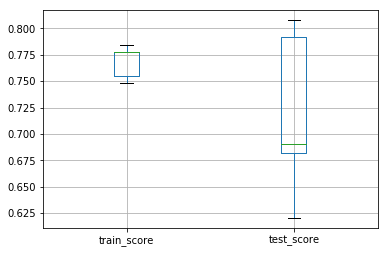

In [129]:
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(StandardScaler(), SimpleImputer())
preprocessor = make_column_transformer((col_cat, pipe_cat), (col_num, pipe_num))

pipe = make_pipeline(preprocessor, LogisticRegression(solver='lbfgs'))

param_grid = {'columntransformer__pipeline-2__simpleimputer__strategy': ['mean', 'median'],
              'logisticregression__C': [0.1, 1.0, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid, X, y, scoring='balanced_accuracy', cv=5, n_jobs=-1, return_train_score=True))
scores[['train_score', 'test_score']].boxplot()

#### 练习

完成接下来的练习：

加载位于`./data/adult_openml.csv`中的成人数据集。 制作自己的`ColumnTransformer`预处理器，并用分类器管道化它。对其进行微调并在交叉验证中检查预测准确性。

* 使用`pd.read_csv`读取位于`./data/adult_openml.csv`中的成人数据集。

In [131]:
# %load solutions/05_1_solutions.py

* 将数据集拆分为数据和目标。 目标对应于类列。 对于数据，删除列`fnlwgt`，`capitalgain`和`capitalloss`。

In [133]:
# %load solutions/05_2_solutions.py

* 目标未编码。 使用`sklearn.preprocessing.LabelEncoder`对类进行编码。

In [134]:
# %load solutions/05_3_solutions.py

* 创建一个包含分类列名称的列表。 同样，对数值数据也一样。

In [135]:
# %load solutions/05_4_solutions.py

* 创建一个管道以对分类数据进行读热编码。 使用`KBinsDiscretizer`作为数值数据。 从`sklearn.preprocessing`导入它。

In [136]:
# %load solutions/05_5_solutions.py

* 使用`make_column_transformer`创建预处理器。 您应该将好的管道应用于好的列。

In [137]:
# %load solutions/05_6_solutions.py

使用`LogisticRegression`分类器对预处理器进行管道传输。 随后定义网格搜索以找到最佳参数`C`.使用`cross_validate`在交叉验证方案中训练和测试此工作流程。

In [138]:
# %load solutions/05_7_solutions.py